Natural Language Processing in Tensorflow
---------------------------------------------------------------
1. Sentiment in text
1. Word Embeddings
1. **Sequence models**
1. Sequence models and literature

Sequence Models
-----------------
- Week2에서는 Embedding이라는 과정을 통해서 NN이 어떻게 단어의 의미를 학습할 수 있는지 간단한 예제들을 통해서 학습함
- 단어들의 위치, 배열에 따라서 어떠한 의미를 가지는지를 학습하는 것은 문장의 의미를 학습하는 것에 있어서 매우 중요
- Week3에서는 RNN, LSTM의 Sequential한 Architecture를 이용해서 문맥을 전달하는 방법에 대해서 학습할 예정임

**Note:** This notebook can run using TensorFlow 2.5.0

In [1]:
#!pip install tensorflow==2.5.0

# Single Layer LSTM

- LSTM: 간단하게 설명하자면 cell state라는 곳에 이전 함수 상태를 저장해놓음으로써 이후에 함수 처리에 있어서 영향을 주는 기법을 말함. 하지만 이는 단방향 LSTM에서의 이야기이고, 양방향 LSTM의 경우에는 뒤에 있는 함수가 앞에 있는 함수에 영향을 끼칠 수 있음.

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.6.0


In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteML2CY4/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteML2CY4/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteML2CY4/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


- TensorFlow에서 제공되는 dataset, TFDS(TensorFlow Data Services)를 사용하기 위해서 import
- 본 예제에서는 그 중 영화 리뷰와 관련된 자료인 imdb 자료를 load
- imdb: 많은 양의 데이터와 50,000개의 영화 리뷰를 포함하고 있으며, 이는 긍정적인 리뷰 또는 부정적인 리뷰로 분류되어 있음
- TFDS를 사용하면 train data와 test data를 분류가 이미 되어있으므로 ML과 DL에 사용하기 편리함
- 하위폴더인 subwords8k를 사용함으로써 미리 토큰화한 데이터를 가지고 학습에 사용함

In [4]:
tokenizer = info.features['text'].encoder

- Access the subword text encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

- tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)): 문맥을 파악하기 위한 양방향 LSTM을 정의하는 방법. parameter(number of output)으로 64를 입력했는데, 직접 model.summary()를 실행하면 128개의 output이 나오는 것을 확인할 수 있음. 이는 Bidirectional이기 때문.
  * 본 예제에서는 Single layer LSTM에 대해서 학습을 진행

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 173s 420ms/step - loss: 0.5724 - accuracy: 0.7100 - val_loss: 0.7024 - val_accuracy: 0.5000
Epoch 2/10
391/391 [==============================] - 162s 412ms/step - loss: 0.5446 - accuracy: 0.7284 - val_loss: 0.5266 - val_accuracy: 0.7550
Epoch 3/10
391/391 [==============================] - 163s 415ms/step - loss: 0.4068 - accuracy: 0.8355 - val_loss: 0.4492 - val_accuracy: 0.8107
Epoch 4/10
391/391 [==============================] - 163s 416ms/step - loss: 0.3070 - accuracy: 0.8788 - val_loss: 0.4002 - val_accuracy: 0.8233
Epoch 5/10
391/391 [==============================] - 164s 418ms/step - loss: 0.2859 - accuracy: 0.8840 - val_loss: 0.3831 - val_accuracy: 0.8313
Epoch 6/10
391/391 [==============================] - 163s 415ms/step - loss: 0.1970 - accuracy: 0.9283 - val_loss: 0.3718 - val_accuracy: 0.8617
Epoch 7/10
391/391 [==============================] - 163s 416ms/step - loss: 0.1628 - accuracy: 0.9417 - val_loss: 0.4099 -

In [9]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

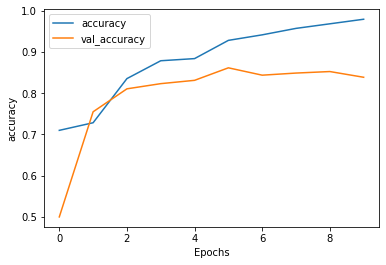

In [10]:
plot_graphs(history, 'accuracy')

- Single layer LSTM의 학습 accuracy와 validation accuracy를 plot

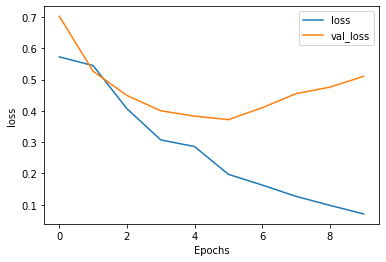

In [11]:
plot_graphs(history, 'loss')

- Single layer LSTM의 학습 loss와 validation loss를 plot